# <font color=blue> **Machine Learning - Unsupervised Learning : Graded Project**</font>

## Domain : <font color=#338CFF>E - Commerce</font>

### Business Context :

- Customer segmentation is one of the most important marketing tools at your
disposal, because it can help a business to better understand its target audience.
This is because it groups customers based on common characteristics.
- Segmentation can be based on the customer’s habits and lifestyle, in
particular, their buying habits. Different age groups, for example, tend to
spend their money in different ways, so brands need to be aware of who
exactly is buying their product.
- Segmentation also focuses more on the personality of the consumer,
including their opinions, interests, reviews, and rating. Breaking down a
large customer base into more manageable clusters, making it easier to
identify your target audience and launch campaigns and promote the
business to the most relevant people

### Dataset Description :

The dataset contains measurements of clothing fit from RentTheRunway.
RentTheRunWay is a unique platform that allows women to rent clothes for
various occasions. The collected data is of several categories. This dataset
contains self-reported fit feedback from customers as well as other side
information like reviews, ratings, product categories, catalog sizes, customers’
measurements (etc.)

### Data Citation :

- Rishabh Misra, Mengting Wan, Julian McAuley "Decomposing Fit Semantics
for Product Size Recommendation in Metric Spaces". RecSys, 2018.
- Rishabh Misra, Jigyasa Grover "Sculpting Data for ML: The first act of
Machine Learning". 2021.

### Attribute Information :

1. user_id - a unique id for the customer
2. item_id - unique product id
3. weight - weight measurement of customer
4. rented for - purpose clothing was rented for
5. body type - body type of customer
6. review_text - review given by the customer
7. size - the standardized size of the product
8. rating - rating for the product
9. age - age of the customer
10. category - the category of the product
11. bust size - bust measurement of customer
12. height - height of the customer
13. review_date - date when the review was written
14. fit - fit feedback.

### Project Objective :

Based on the given users and items data of an e-commerce company, segment
the similar user and items into suitable clusters. Analyze the clusters and provide
your insights to help the organization promote their business.

# <font color=#338CFF>● Import the required libraries and load the data</font>

### 1. Load the required libraries and read the dataset.

In [1]:
## Importing required libraries 

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "ticks")
import ptitprince as pt
import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from scipy.stats import zscore
from scipy.spatial import distance
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [2]:
## Loading dataset
df = pd.read_csv("renttherunway.csv")

### 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [3]:
## Checking the first 5 rows from the dataset
df.head()

,Unnamed: 0,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"


In [4]:
## Checking the shape of the dataset
df.shape

(192544, 16)

In [5]:
## Gaining the basic information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      192544 non-null  int64  
 1   fit             192544 non-null  object 
 2   user_id         192544 non-null  int64  
 3   bust size       174133 non-null  object 
 4   item_id         192544 non-null  int64  
 5   weight          162562 non-null  object 
 6   rating          192462 non-null  float64
 7   rented for      192534 non-null  object 
 8   review_text     192482 non-null  object 
 9   body type       177907 non-null  object 
 10  review_summary  192199 non-null  object 
 11  category        192544 non-null  object 
 12  height          191867 non-null  object 
 13  size            192544 non-null  int64  
 14  age             191584 non-null  float64
 15  review_date     192544 non-null  object 
dtypes: float64(2), int64(4), object(10)
memory usage: 23.5+ 

In [6]:
## Checkiing the size of data
df.size

3080704

In [7]:
## Checkining the dimension of dataframe
df.ndim

2

In [8]:
## Checking the dimension of series in the dataframe
df["fit"].ndim

1

In [9]:
## Checking the statistical summary of the dataset
df.describe()

,Unnamed: 0,user_id,item_id,rating,size,age
count,192544.000000,192544.000000,1.925440e+05,192462.000000,192544.000000,191584.000000
mean,96271.500000,499494.100149,1.045684e+06,9.092371,12.245175,33.871017
std,55582.809453,289059.719328,8.053148e+05,1.430044,8.494877,8.058083
min,0.000000,9.000000,1.233730e+05,2.000000,0.000000,0.000000
25%,48135.750000,250654.250000,1.950760e+05,8.000000,8.000000,29.000000
50%,96271.500000,499419.000000,9.483960e+05,10.000000,12.000000,32.000000
75%,144407.250000,750974.000000,1.678888e+06,10.000000,16.000000,37.000000
max,192543.000000,999997.000000,2.966087e+06,10.000000,58.000000,117.000000


In [10]:
## Checking the statistical summary of dataset -- for object type
df.describe(include = 'O')

,fit,bust size,weight,rented for,review_text,body type,review_summary,category,height,review_date
count,192544,174133,162562,192534,192482,177907,192199,192544,191867,192544
unique,3,106,190,9,191027,7,154736,68,24,2274
top,fit,34b,130lbs,wedding,.,hourglass,Stylist Review,dress,"5' 4""","June 15, 2016"
freq,142058,27285,14370,57784,63,55349,977,92884,28012,844


In [11]:
## Checking the Percentage of null values in a specific column of the dataset
df.isnull().sum()/len(df) * 100

Unnamed: 0         0.000000
fit                0.000000
user_id            0.000000
bust size          9.561970
item_id            0.000000
weight            15.571506
rating             0.042588
rented for         0.005194
review_text        0.032200
body type          7.601899
review_summary     0.179180
category           0.000000
height             0.351608
size               0.000000
age                0.498587
review_date        0.000000
dtype: float64

### Inferences :

- We have 192544 entries and 16 columns in the dataset consisting of integer, float and object type of data
- Entire size of data is: (192544 x 16) = 3080704
- We have a 2 dimensional dataset (columns and rows); The entries of the column are 1 dimensional data
- We can see that there are some null entries also in some columns

# <font color=#338CFF>● Data cleansing and Exploratory data analysis</font>

### 3. Check if there are any duplicate records in the dataset? If any, drop them.

In [12]:
check_duplicate = len(df[df.duplicated()])
if check_duplicate > 0:
   
    df = df.drop_duplicates()

    print(f"\033[1m{check_duplicate} duplicate record(s) found and dropped.\033[0m")
else:
    print("\033[1mNo duplicate records found.\033[0m")


No duplicate records found.


### Inferences :

- From the above result, we can observe that there are no duplicate records found. Hence no record is dropped from the dataset.

### 4. Drop the columns which you think redundant for the analysis. (Hint: drop columns like ‘id’, ‘review’)

In [13]:
df.columns

Index(['Unnamed: 0', 'fit', 'user_id', 'bust size', 'item_id', 'weight',
       'rating', 'rented for', 'review_text', 'body type', 'review_summary',
       'category', 'height', 'size', 'age', 'review_date'],
      dtype='object')

In [14]:
## Dropping the columns.
df = df.drop(['Unnamed: 0', 'user_id', 'item_id','review_text','review_summary','review_date'], axis=1)

In [15]:
df.columns

Index(['fit', 'bust size', 'weight', 'rating', 'rented for', 'body type',
       'category', 'height', 'size', 'age'],
      dtype='object')

In [16]:
df.shape

(192544, 10)

In [17]:
df.head()

,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,fit,34d,137lbs,10.0,vacation,hourglass,romper,"5' 8""",14,28.0
1,fit,34b,132lbs,10.0,other,straight & narrow,gown,"5' 6""",12,36.0
2,fit,NaN,NaN,10.0,party,NaN,sheath,"5' 4""",4,116.0
3,fit,34c,135lbs,8.0,formal affair,pear,dress,"5' 5""",8,34.0
4,fit,34b,145lbs,10.0,wedding,athletic,gown,"5' 9""",12,27.0


### Inferences :

- We dropped these redundant columns : 'Unnamed', 'user_id', 'item_id', 'review_text', 'review_summary', 'review_date'

### 5. Check the column 'weight', Is there any presence of string data? If yes, remove the string data and convert to float. (Hint: 'weight' has the suffix as lbs)

In [18]:
df['weight']

0         137lbs
1         132lbs
2            NaN
3         135lbs
4         145lbs
           ...  
192539    140lbs
192540    100lbs
192541    135lbs
192542    165lbs
192543    155lbs
Name: weight, Length: 192544, dtype: object

In [19]:
df['weight']=pd.to_numeric(df['weight'].str.replace('lbs',''))

In [20]:
df['weight']

0         137.0
1         132.0
2           NaN
3         135.0
4         145.0
          ...  
192539    140.0
192540    100.0
192541    135.0
192542    165.0
192543    155.0
Name: weight, Length: 192544, dtype: float64

In [21]:
df.weight.fillna(0, inplace=True)

In [22]:
df['weight']

0         137.0
1         132.0
2           0.0
3         135.0
4         145.0
          ...  
192539    140.0
192540    100.0
192541    135.0
192542    165.0
192543    155.0
Name: weight, Length: 192544, dtype: float64

### Inferences :

- Due to the presence of some null values, we cannot perform required weight data handling directly. Hence performing imputation for the missing entries initially.
- Removed the 'lbs' from weight entries and converted it to float as per the requirement.

### 6. Check the unique categories for the column 'rented for' and group 'party: cocktail' category with 'party'.

In [23]:
## Checking unique categories in the column 'rented for'.
df['rented for'].unique()

array(['vacation', 'other', 'party', 'formal affair', 'wedding', 'date',
       'everyday', 'work', nan, 'party: cocktail'], dtype=object)

In [24]:
## Check for sum of missing values in this column.
df['rented for'].isnull().sum()

10

In [25]:
## Display all the missing values in the column.
df_missing = pd.DataFrame({'value':df['rented for'],'missing':df['rented for'].isnull()})
df_missing[df_missing['missing']==True]

,value,missing
7391,NaN,True
17609,NaN,True
26600,NaN,True
55393,NaN,True
65074,NaN,True
71397,NaN,True
76804,NaN,True
86065,NaN,True
148559,NaN,True
176050,NaN,True


In [26]:
## Find the most frequent value in the columns.
mode = df['rented for'].mode()[0]

## Replace the mode value with the missing values in the column.
df['rented for'].fillna(mode, inplace=True)

In [27]:
df['rented for'] = df['rented for'].replace('party: cocktail','party')
df['rented for'].unique()

array(['vacation', 'other', 'party', 'formal affair', 'wedding', 'date',
       'everyday', 'work'], dtype=object)

### Inferences :

- We did checking for the unique attributes of "rented for" column and changed category ('party: cocktail') to 'party'.

### 7. The column 'height' is in feet with a quotation mark, Convert to inches with float datatype.

In [28]:
df['height']

0         5' 8"
1         5' 6"
2         5' 4"
3         5' 5"
4         5' 9"
          ...  
192539    5' 9"
192540    5' 1"
192541    5' 8"
192542    5' 6"
192543    5' 6"
Name: height, Length: 192544, dtype: object

In [29]:
## Converting "height" column to inches by removing quotation mark.
df['height'] = df['height'].str.replace('"','')
df['height']

0         5' 8
1         5' 6
2         5' 4
3         5' 5
4         5' 9
          ... 
192539    5' 9
192540    5' 1
192541    5' 8
192542    5' 6
192543    5' 6
Name: height, Length: 192544, dtype: object

In [30]:
df["height"] = (df.height.str.split("'").str[0].astype(float) * 12) + (
    df.height.str.split("'").str[1].astype(float))
df['height']

0         68.0
1         66.0
2         64.0
3         65.0
4         69.0
          ... 
192539    69.0
192540    61.0
192541    68.0
192542    66.0
192543    66.0
Name: height, Length: 192544, dtype: float64

### Inferences :

- Now "Height" column is converted to Float datatype (dtype: float64).
- Quotation mark has been removed as requested and height is in inches.

### 8. Check for missing values in each column of the dataset? If it exists, impute them with appropriate methods.

In [31]:
## Getting column-wise count of missing values.
df.isnull().sum()/len(df) * 100

fit           0.000000
bust size     9.561970
weight        0.000000
rating        0.042588
rented for    0.000000
body type     7.601899
category      0.000000
height        0.351608
size          0.000000
age           0.498587
dtype: float64

In [32]:
## Including imputation for missing entries.
missing_values = df.isnull().sum()/len(df)

## These are the index of both categorical columns as well as numerical columns having null values.
index = [i  for i in missing_values[missing_values>0].index]

## separating numerical columns and categorical columns
numerical_columns = [i     for i in index      if i in df.columns and  df[i].dtype!=object]
categorical_columns = [i     for i in index      if i in df.columns and  df[i].dtype==object]

## Filling the null values of the numerical columns with median computation.
for columns in numerical_columns:
    df[columns]=df[columns].fillna(df[columns].median())
    
## Filling the null values of the categorical columns with mode computation.
for columns in categorical_columns:
    df[columns]=df[columns].fillna(df[columns].mode()[0])

In [33]:
df.isnull().sum()/len(df) * 100

fit           0.0
bust size     0.0
weight        0.0
rating        0.0
rented for    0.0
body type     0.0
category      0.0
height        0.0
size          0.0
age           0.0
dtype: float64

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   fit         192544 non-null  object 
 1   bust size   192544 non-null  object 
 2   weight      192544 non-null  float64
 3   rating      192544 non-null  float64
 4   rented for  192544 non-null  object 
 5   body type   192544 non-null  object 
 6   category    192544 non-null  object 
 7   height      192544 non-null  float64
 8   size        192544 non-null  int64  
 9   age         192544 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 14.7+ MB


### Inferences :

- Total count of missing entries in each column is observed.
- All null or NaN values are imputed as:
    - 0 for float datatype.
    - 'Missing' for object datatype (string).
- Finally, all column information is retrieved and it is verified that there are no null values in the dataset.

### 9. Check the statistical summary for the numerical and categorical columns and write your findings.

In [35]:
## Checking the statistical summary of data.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
weight,192544.0,115.997751,53.726993,0.0,115.0,130.0,145.0,300.0
rating,192544.0,9.092758,1.429862,2.0,8.0,10.0,10.0,10.0
height,192544.0,65.309529,2.658857,54.0,63.0,65.0,67.0,78.0
size,192544.0,12.245175,8.494877,0.0,8.0,12.0,16.0,58.0
age,192544.0,33.861689,8.039050,0.0,29.0,32.0,37.0,117.0


In [36]:
## Checking the statistical summary of data -- for object type.
df.describe(include = 'O').T

,count,unique,top,freq
fit,192544,3,fit,142058
bust size,192544,106,34b,45696
rented for,192544,8,wedding,57794
body type,192544,7,hourglass,69986
category,192544,68,dress,92884


### Inferences :

- There are a total of 192544 records with 5 numerical columns and 5 object type columns.
- It is evident that the minimum value of numerical values are 0 and the maximum vallues correspond to the respective columns values.
- We have records of people from all age categories upto 117 (max age)
- We are also able to get the frequent occurances of body-type, category and rented-for purpose which helps us to derive the most preferred option of customers, therby helping to restock in the e-commerce business
- The average weight of the customer is around 115lbs, maximum weight is 300 lbs.
- The average rating is around 9.
- The maximum rating is 10.0
- The maximum height of the customer is 78 inches.
- The maximum standarized size of the product is 58.
- The age ranges from minimum 0 to maximum 117 with average as 33.8.
- As min age is 0, we need to impute it with proper value and the maximum age we need to cap it to Upperlimit.
- Most of the customers had fit dresses with bust size 34b and rented the product for wedding and the most appeared product category is as dress.Most of the customers had hourglass bodytype.

### 10. Are there outliers present in the column age? If yes, treat them with the appropriate method. 

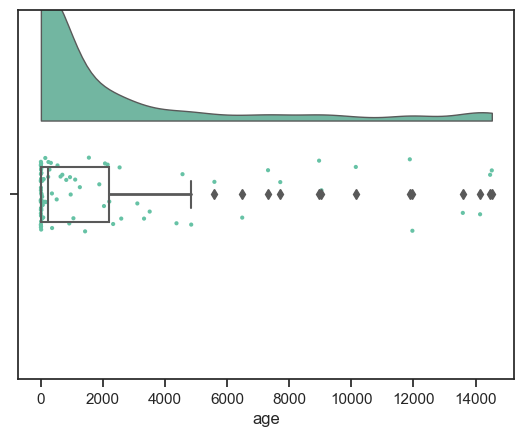

In [37]:
## Plotting the box-plot of 'age' -- with outliers : before treatement
pt.RainCloud(df['age'].value_counts())
plt.show()

In [38]:
## Treating outliers using IQR method
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3-Q1
print(Q1)
print(Q3)
print(IQR)

29.0
37.0
8.0


In [39]:
lower_whisker  = Q1-(1.5*IQR)
upper_whisker  = Q3+(1.5*IQR)
print(lower_whisker)
print(upper_whisker)

17.0
49.0


In [40]:
df_out = df.loc[(df['age'] < upper_whisker) & (df['age'] > lower_whisker)]

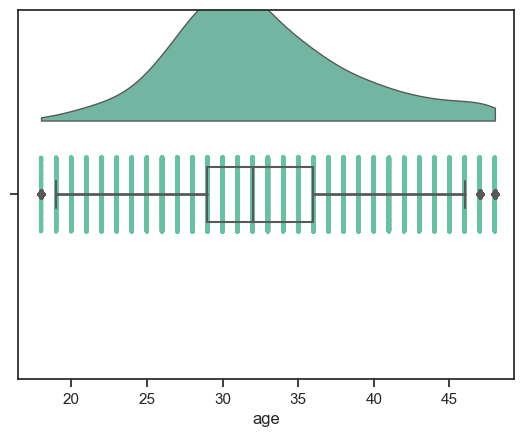

In [41]:
## Plotting boxplot of IQR treated dataset.
pt.RainCloud(df_out['age'])
plt.show()

### Inferences :

- From the box-plot, it is evident that there are a lot of outliers available for the column 'age'.
- So using the IQR treatment, the outliers are removed and minimised. The results of the same can be observed in the after treatment box-plot.

### 11. Check the distribution of the different categories in the column 'rented for' using appropriate plot.

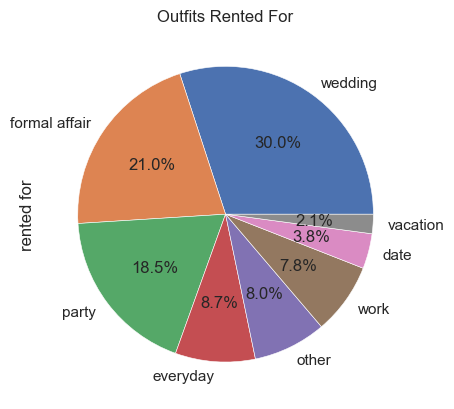

In [42]:
## Let's check the count of target variable
df['rented for'].value_counts().plot(kind='pie', autopct='%1.1f%%',
                                    wedgeprops={"edgecolor": "white",
                                                'linewidth': 0.4,
                                                'antialiased': True})
plt.title('Outfits Rented For')
plt.show()

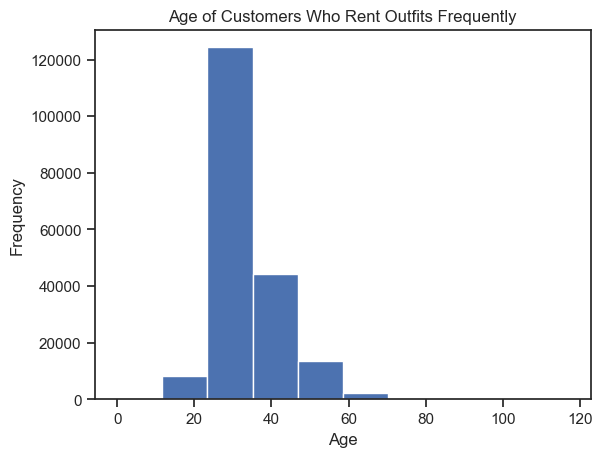

In [43]:
plt.hist(df['age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age of Customers Who Rent Outfits Frequently')
plt.show()

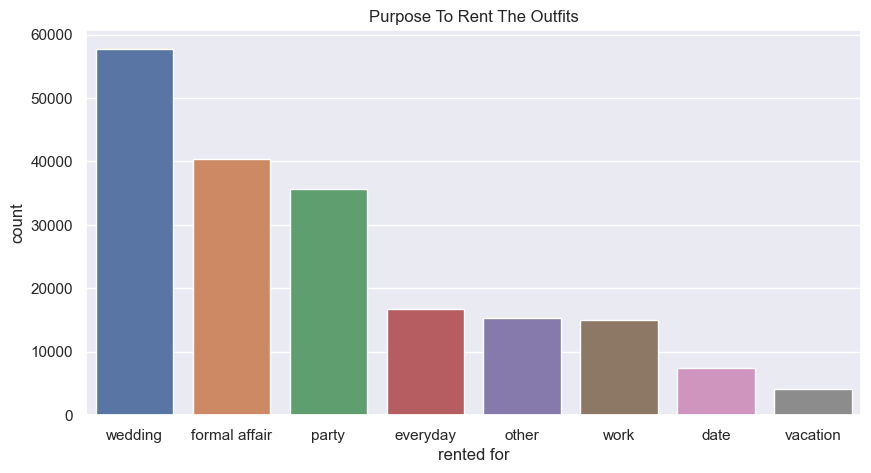

In [44]:
# Ploting the categorical values using count plot
sns.set(rc={"figure.figsize":(10,5)})
sns.countplot(x='rented for', data = df, 
              order=['wedding','formal affair','party','everyday','other','work','date','vacation'])
plt.title('Purpose To Rent The Outfits')
plt.show()

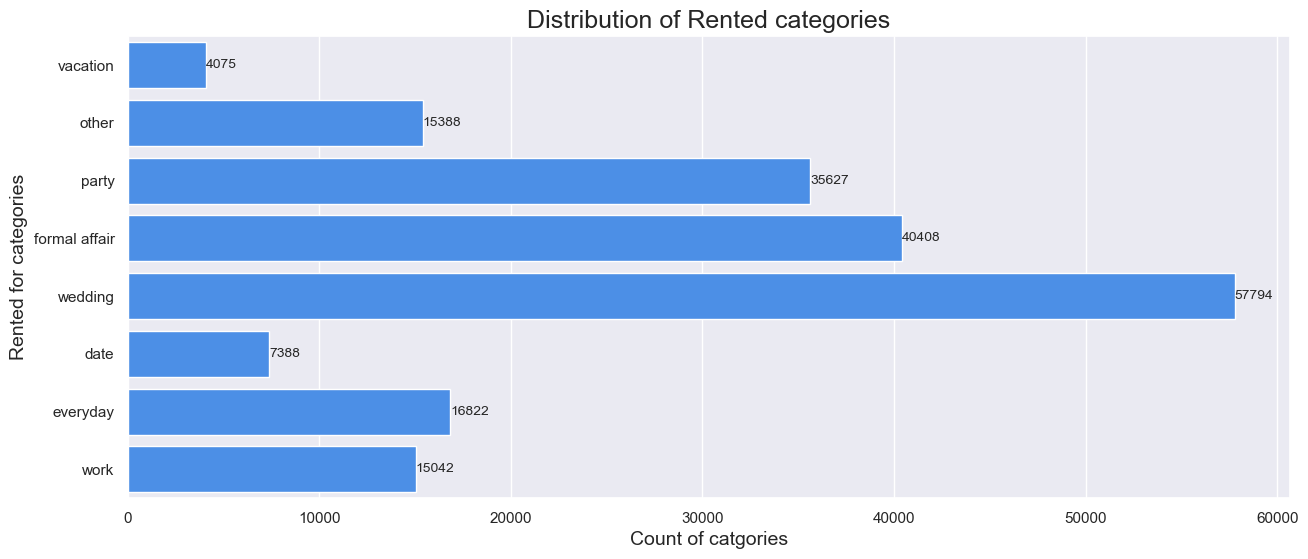

In [45]:
## count plot for 'rented for' column

plt.figure(figsize = (15, 6))
position_df = sns.countplot(y = df['rented for'], color = '#338CFF')

position_df.set_xlabel(xlabel = 'Count of catgories', fontsize = 14)
position_df.set_ylabel(ylabel = 'Rented for categories', fontsize = 14)
position_df.set_title(label = 'Distribution of Rented categories', fontsize = 18)

position_df.bar_label(position_df.containers[0], fontsize = 10)

plt.show()

### Inferences :

- The above plots show distribution of Rented-for categories over the dataset.
- The outfits are most frequently rented by customers aged 21 to 30 years.
- It is seen that customers rent outfits mostly for 'weddings' followed by 'formal affair' and least for 'vacation'.
- The number of customers who rented their costumes for weddings range about 57794 (approx 58,000) which computes to 30% of total categories.
- The least used purpose like 'vacation' includes about 4075 entries (2%) and 'date' includes 7388 entries (4%).

# <font color=#338CFF>● Data Preparation for model building :</font>

### 12. Encode the categorical variables in the dataset.

In [46]:
df.head()

,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,fit,34d,137.0,10.0,vacation,hourglass,romper,68.0,14,28.0
1,fit,34b,132.0,10.0,other,straight & narrow,gown,66.0,12,36.0
2,fit,34b,0.0,10.0,party,hourglass,sheath,64.0,4,116.0
3,fit,34c,135.0,8.0,formal affair,pear,dress,65.0,8,34.0
4,fit,34b,145.0,10.0,wedding,athletic,gown,69.0,12,27.0


In [47]:
## Get all columns with type 'Object'
df.select_dtypes('object').columns

Index(['fit', 'bust size', 'rented for', 'body type', 'category'], dtype='object')

In [48]:
## Perform label encoding for selected columns.
lbl_encoder = LabelEncoder()
for i in df.select_dtypes('object').columns:
    df[i] = df[[i]].apply(lbl_encoder.fit_transform)
    
df.head()

,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,0,39,137.0,10.0,5,3,44,68.0,14,28.0
1,0,37,132.0,10.0,3,6,20,66.0,12,36.0
2,0,37,0.0,10.0,4,3,45,64.0,4,116.0
3,0,38,135.0,8.0,2,4,16,65.0,8,34.0
4,0,37,145.0,10.0,6,1,20,69.0,12,27.0


### Inferences :

- All categorical columns are encoded and now converted to numerical type using the LabelEncoder technique.

### 13. Standardize the data, so that the values are within a particular range.

In [49]:
## Standardizing the columns

ds = df.copy()
scaled_features = StandardScaler().fit_transform(ds.values)
scaled_features_df = pd.DataFrame(scaled_features, index = ds.index, columns = ds.columns)

print("\033[1mAll features are now scaled.\033[0m")
scaled_features_df.head()

All features are now scaled.


,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,-0.556291,-0.004640,0.390908,0.634498,0.514420,0.020953,1.569310,1.011893,0.206575,-0.729154
1,-0.556291,-0.187210,0.297845,0.634498,-0.456753,1.927582,-0.307247,0.259688,-0.028862,0.265991
2,-0.556291,-0.187210,-2.159027,0.634498,0.028833,0.020953,1.647500,-0.492517,-0.970608,10.217442
3,-0.556291,-0.095925,0.353683,-0.764242,-0.942340,0.656496,-0.620006,-0.116415,-0.499735,0.017205
4,-0.556291,-0.187210,0.539809,0.634498,1.000007,-1.250132,-0.307247,1.387995,-0.028862,-0.853547


# <font color=#338CFF>● Principal Component Analysis and Clustering:</font>

### 14. Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained by the same.

In [50]:
## Step 1: Calculate the covariance matrix

cov_matrix = np.cov(scaled_features.T)
print('\033[1mCovariance Matrix\033[0m','\n', cov_matrix)

Covariance Matrix 
 [[ 1.00000519e+00  9.05525666e-03  1.08364122e-02 -2.45044635e-01
   8.35378787e-03 -7.61016810e-03  3.35892077e-04  1.44717645e-04
   6.54006939e-02  1.59721574e-03]
 [ 9.05525666e-03  1.00000519e+00  1.08070497e-01 -2.09457651e-02
  -2.07814670e-03 -2.15702411e-01 -1.09647683e-02  1.47036167e-01
   6.27115858e-01  1.65476458e-01]
 [ 1.08364122e-02  1.08070497e-01  1.00000519e+00 -1.06718612e-02
  -7.62722271e-04 -6.09053505e-02  3.00232412e-03  9.99995829e-02
   8.77275791e-02  6.13719839e-02]
 [-2.45044635e-01 -2.09457651e-02 -1.06718612e-02  1.00000519e+00
   1.27900970e-02  4.72965534e-03 -2.37071846e-02  1.74835660e-03
  -3.67286881e-02 -3.51310734e-02]
 [ 8.35378787e-03 -2.07814670e-03 -7.62722271e-04  1.27900970e-02
   1.00000519e+00 -9.08626233e-03 -5.76351186e-02 -1.70706029e-02
   4.87422452e-03 -3.82507449e-02]
 [-7.61016810e-03 -2.15702411e-01 -6.09053505e-02  4.72965534e-03
  -9.08626233e-03  1.00000519e+00 -1.85295641e-03 -1.33577071e-01
  -2.14155816

In [51]:
## Step 2: Calculate eigen values and eigen vectors

eig_values, eig_vectors = np.linalg.eig(cov_matrix)
print('\033[1mEigen Values: \033[0m','\n', eig_values)
print('\n')
print('\033[1mEigen Vectors: \033[0m','\n',eig_vectors)

Eigen Values:  
 [1.945643   0.36355653 1.24496209 0.75084617 1.0791104  0.81962035
 0.85986136 1.01736841 0.94489036 0.97419325]


Eigen Vectors:  
 [[-0.06930927 -0.0665161   0.68994501 -0.68987833 -0.15623892  0.09531226
  -0.01353889 -0.05897008 -0.03381583  0.0227223 ]
 [-0.58402388 -0.68821313 -0.060179    0.09306565  0.01276096  0.29996784
  -0.16901184  0.20405555 -0.00182057  0.11245239]
 [-0.19200692  0.03500209 -0.0195775   0.02566158  0.03275975  0.29778597
   0.0777169  -0.35223305  0.09818093 -0.85520125]
 [ 0.06597648 -0.00623062 -0.69963665 -0.69549365  0.02331943  0.13261545
  -0.04930051  0.03596742  0.02109385  0.01027737]
 [ 0.00995062 -0.01043188 -0.03733465  0.02325481 -0.63367573 -0.17654855
  -0.09775511  0.26573374  0.68480102 -0.12657117]
 [ 0.33452057 -0.01294237  0.08362293  0.03206475  0.12288175  0.07714137
  -0.86996435  0.20258878 -0.11151459 -0.22032051]
 [ 0.00225174 -0.00757859  0.08691688 -0.04116944  0.59287011  0.04241727
  -0.11765343 -0.28748347 

In [52]:
## Step 3 : Calculating the Variance explained and the cummulative variance explained
total = sum(eig_values)
var_exp = [ (i/total)*100  for i in sorted(eig_values, reverse = True)]
cum_var_exp = np.cumsum(var_exp)
print('\033[1mVariance Explained : \033[0m','\n', var_exp)
print('\n')
print('\033[1mCummulative Variance Explained : \033[0m','\n', cum_var_exp)

Variance Explained :  
 [19.456328983945685, 12.449556238547006, 10.791047983508454, 10.17363124291177, 9.741881891371564, 9.448854545336797, 8.598568974754688, 8.196160937503079, 7.508422751840696, 3.635546450280251]


Cummulative Variance Explained :  
 [ 19.45632898  31.90588522  42.69693321  52.87056445  62.61244634
  72.06130089  80.65986986  88.8560308   96.36445355 100.        ]


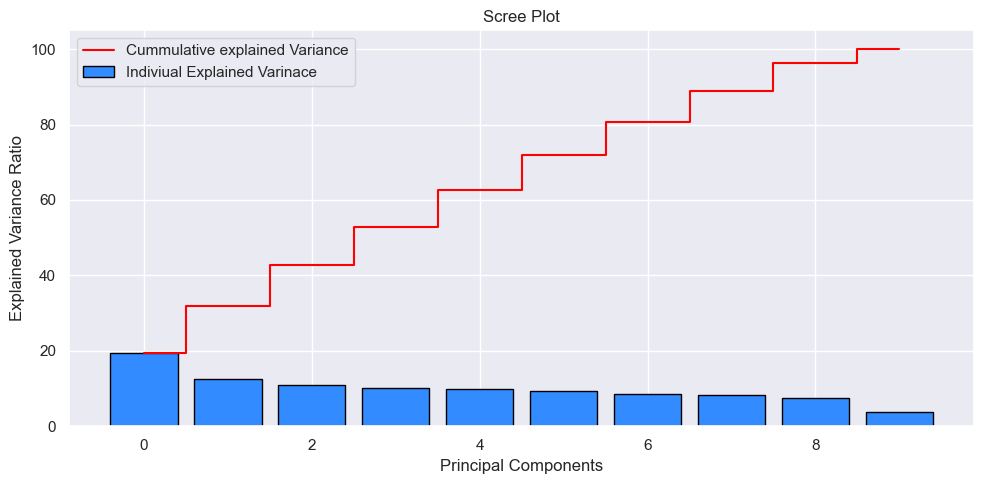

In [53]:
## Scree plot
plt.bar(range(10), var_exp, align ='center', color ='#338CFF', edgecolor ='black', label ='Indiviual Explained Varinace')
plt.step(range(10), cum_var_exp, where ='mid', color ='red', label ='Cummulative explained Variance')
plt.legend(loc = 'best')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.tight_layout()
plt.show()

### Inference :

- It is observed from the above Scree plot, that first 8 principal components are explaining about 90-95% of the variation.
- Hence, the optimal number of principal componets is chosen as 8.

### 15. Apply K-means clustering and segment the data. (You may use original data or PCA transformed data)

**a. Find the optimal K Value using elbow plot for K Means clustering.**

**b. Build a Kmeans clustering model using the obtained optimal K value from the elbow plot.**

**c. Compute silhouette score for evaluating the quality of the K Means clustering technique.**

In [54]:
## Using the dimensions obtained from the PCA to apply clustering.(i.e, 8)

pca = PCA(n_components = 8)
pca.fit(scaled_features_df)

PCA(n_components=8)

In [55]:
pca_df = pd.DataFrame(pca.fit_transform(scaled_features_df), columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,0.238310,-0.866627,0.249611,-1.340474,-0.250386,1.386982,0.725454,0.065037
1,-0.650491,-0.683560,0.527196,0.258194,0.804137,-0.711108,1.609236,0.040168
2,0.987051,-0.006861,5.440847,5.929386,1.485445,1.149738,-1.362435,6.251602
3,-0.515265,0.205636,0.428269,-0.065814,0.582750,-1.094915,0.158508,-0.082019
4,0.528899,-1.190026,-1.428931,-1.333130,0.076514,0.515510,-0.510714,0.551037


#### Finding the optimal K Value using Elbow Plot for K Means Clustering.

In [56]:
## Finding optimal K value by KMeans clustering using Elbow Plot

cluster_errors = []
cluster_range = range(2,15)

for num_cluster in cluster_range:
    clusters = KMeans(num_cluster, random_state=100)
    clusters.fit(pca_df)
    cluster_errors.append(clusters.inertia_)

In [57]:
## creating a dataframe of number of clusters and cluster errors

cluster_df = pd.DataFrame({'num_cluster': cluster_range, 'cluster_errors': cluster_errors})
cluster_df

,num_cluster,cluster_errors
0,2,1.476418e+06
1,3,1.342396e+06
2,4,1.221679e+06
3,5,1.121738e+06
4,6,1.046132e+06
5,7,9.938190e+05
6,8,9.502339e+05
7,9,9.188805e+05
8,10,8.914592e+05
9,11,8.687085e+05


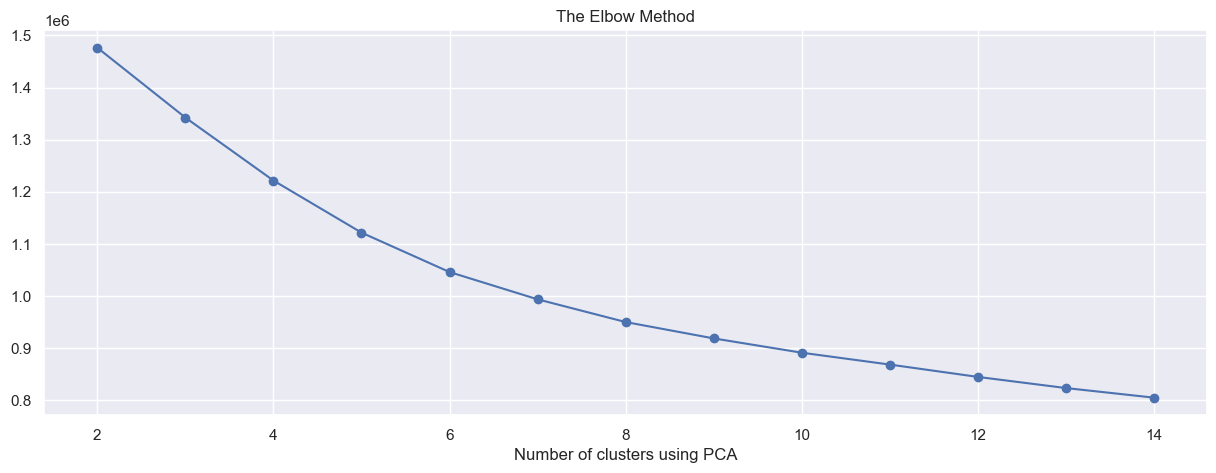

In [58]:
## Elbow method
## Elbow plot
plt.figure(figsize=[15,5])
plt.title('The Elbow Method')
plt.xlabel('Number of clusters using PCA')
plt.plot(cluster_df['num_cluster'], cluster_df['cluster_errors'], marker='o', color='b')
plt.show()

**- From the above Elbow plot, it is observed that at cluster K=4, the inertia descreases significantly.**

- Hence we are selecting the optimal cluster value as K=4.

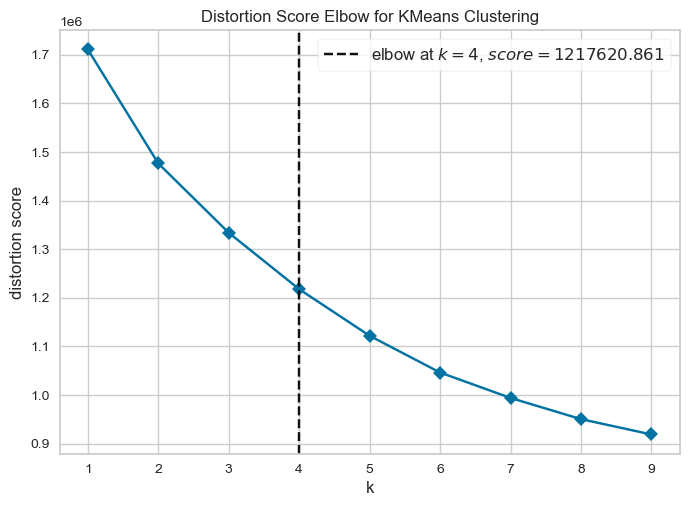

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [59]:
from yellowbrick.cluster import KElbowVisualizer

# Making sure the above elbow score was accurate

model = KMeans()
visulizer = KElbowVisualizer(model,k=(1,10),timings=False)
visulizer.fit(pca_df)
visulizer.show()

#### Building a Kmeans clustering model using the obtained optimal K value from the elbow plot.

In [60]:
## Applying KMeans clustering for optimal number of cluster obtained (K=5)

kmeans = KMeans(n_clusters=4, random_state=100)
kmeans.fit(pca_df)

KMeans(n_clusters=4, random_state=100)

In [61]:
## Creating a dataframe of labels

label = pd.DataFrame(kmeans.labels_, columns=['Label'])


## joining the label dataframe to the pca_df dataframe

kmeans_df = pca_df.join(label)
kmeans_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,Label
0,0.238310,-0.866627,0.249611,-1.340474,-0.250386,1.386982,0.725454,0.065037,3
1,-0.650491,-0.683560,0.527196,0.258194,0.804137,-0.711108,1.609236,0.040168,0
2,0.987051,-0.006861,5.440847,5.929386,1.485445,1.149738,-1.362435,6.251602,3
3,-0.515265,0.205636,0.428269,-0.065814,0.582750,-1.094915,0.158508,-0.082019,0
4,0.528899,-1.190026,-1.428931,-1.333130,0.076514,0.515510,-0.510714,0.551037,2


In [62]:
kmeans_df['Label'].value_counts()

0    79229
2    53917
3    31892
1    27506
Name: Label, dtype: int64

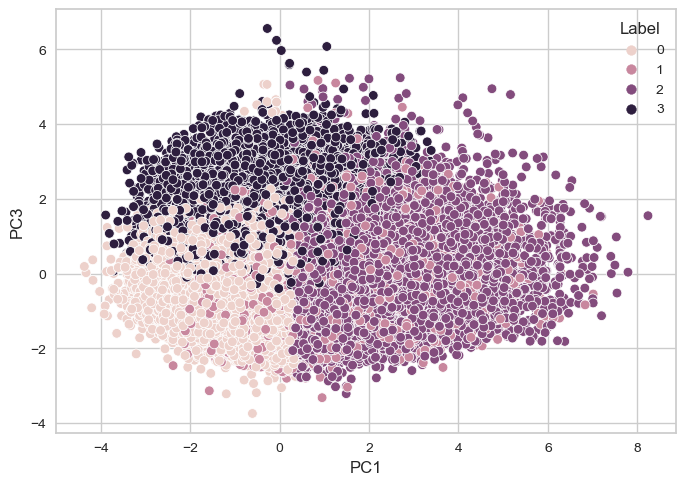

In [63]:
## Visualizing the clusters formed 

sns.scatterplot(x=kmeans_df['PC1'], y=kmeans_df['PC3'], hue='Label', data=kmeans_df)
plt.show()

#### Computing Silhouette Score for evaluating the quality of the K Means clustering technique.

In [64]:
## for 30000 sample data only

## Compute silhouette score for evaluating the quality of the K Means clustering technique. Taking a sample of records to 
## reduce computational time.

kmeans_score1 = []

for i in range(2,15):
    kmeans_1 = KMeans(n_clusters = i)
    kmeans_1 = kmeans_1.fit(pca_df.head(30000))
    labels_1 = kmeans_1.predict(pca_df.head(30000))
    print('\033[1mSilhouette Score for Cluster : \033[0m',i, silhouette_score(pca_df.head(30000), labels_1))

Silhouette Score for Cluster :  2 0.14106528562642892
Silhouette Score for Cluster :  3 0.14873107121302426
Silhouette Score for Cluster :  4 0.14970284035384643
Silhouette Score for Cluster :  5 0.15469451853194652
Silhouette Score for Cluster :  6 0.13693311732595945
Silhouette Score for Cluster :  7 0.12291222472204529
Silhouette Score for Cluster :  8 0.1267710961777997
Silhouette Score for Cluster :  9 0.13009937459226878
Silhouette Score for Cluster :  10 0.12311169277090754
Silhouette Score for Cluster :  11 0.13536185919028434
Silhouette Score for Cluster :  12 0.1266911117763799
Silhouette Score for Cluster :  13 0.12363634872845836
Silhouette Score for Cluster :  14 0.12325307085908464


- We have obtained the Silhoutte scores for various clusters - highest silhouette score is for __i = 5__ which is __0.15469451853194652__.

### 16. Apply Agglomerative clustering and segment the data. (You may use original data or PCA transformed data).

**a. Find the optimal K Value using dendrogram for Agglomerative clustering.**

**b. Build a Agglomerative clustering model using the obtained optimal K
value observed from dendrogram.**

**c. Compute silhouette score for evaluating the quality of the Agglomerative
clustering technique. (Hint: Take a sample of the dataset for agglomerative
clustering to reduce the computational time)**

In [65]:
## Considering a sample dataset of 10000 records only to simplify the computation

scaled_features_sample = scaled_features[:10000,:]
print('\033[1mShape of scaled_features of the complete dataset: \033[0m', scaled_features.shape)
print('\033[1mShape of scaled_features of the sample dataset: \033[0m', scaled_features_sample.shape)

Shape of scaled_features of the complete dataset:  (192544, 10)
Shape of scaled_features of the sample dataset:  (10000, 10)


#### Agglomerative Clustering

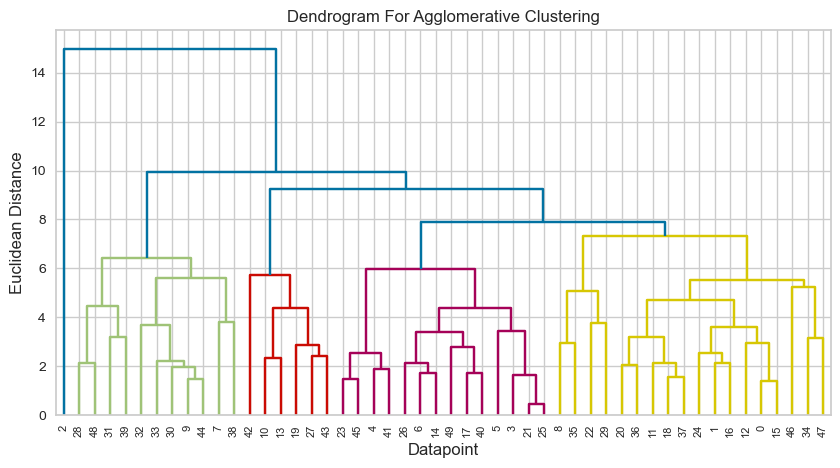

In [66]:
## Agglomerative clustering using original data :: sample dataset  scaled_features[:50] of 50 records
## to CLEARLY SHOW the DENDOGRAM and reduce computational time.

plt.figure(figsize=[10,5])
merg = linkage(scaled_features_sample[:50],method='ward')
dendrogram(merg, leaf_rotation=90,color_threshold=0.5*max(merg[:, 2]))
plt.title('Dendrogram For Agglomerative Clustering')
plt.xlabel('Datapoint')
plt.ylabel('Euclidean Distance')
plt.show()

#### Optimal value of K is 4.

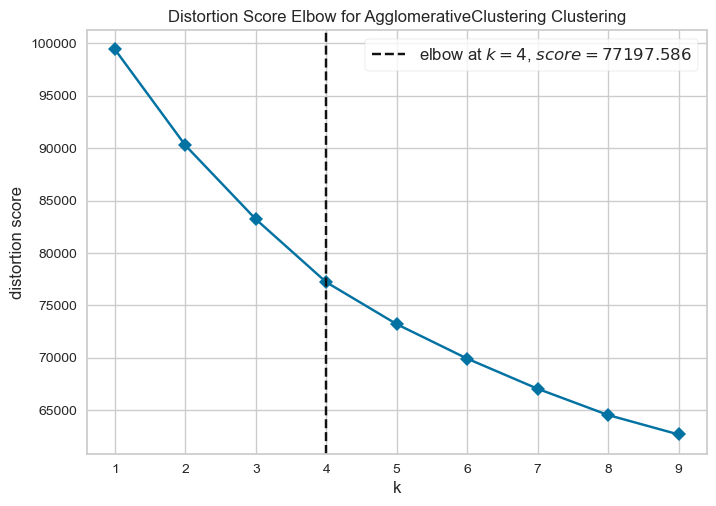

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [67]:
scaled_features_sample = scaled_features[:10000,:]
model_2 = AgglomerativeClustering(linkage='ward')
visulizer = KElbowVisualizer(model_2,k=(1,10),timings=False)
visulizer.fit(scaled_features_sample)
visulizer.show()

#### Inference :

-  **Optimal K value is 4.**

#### Agglomerative clustering model using the obtained optimal K value observed from dendrogram

In [68]:
#Creating Agglomerative Clustering model
Agl_model = AgglomerativeClustering(n_clusters=4, linkage='ward')
Agl_model.fit(scaled_features_sample)

AgglomerativeClustering(n_clusters=4)

In [69]:
## Building hierarchical clustering model using the optimal clusters as 4 for the sample dataset (10000 records)

hie_cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
hie_cluster_model = hie_cluster.fit(pca_df.head(10000))

#### Computing silhouette score for evaluating the quality of the Agglomerative clustering technique.

In [70]:
## Computing Silhoutte score from Agglomerative clustering

scaled_features_df_sample = scaled_features_df.head(10000)

for i in range(2,15):
    hier = AgglomerativeClustering(n_clusters = i)
    hier = hier.fit(scaled_features_df_sample)
    labels = hier.fit_predict(scaled_features_df_sample)
    print('\033[1mSilhouette Score for Cluster : \033[0m',i, silhouette_score(scaled_features_df_sample, labels))

Silhouette Score for Cluster :  2 0.16550953971035573
Silhouette Score for Cluster :  3 0.14760686354589178
Silhouette Score for Cluster :  4 0.09660599854841345
Silhouette Score for Cluster :  5 0.09497209673117368
Silhouette Score for Cluster :  6 0.0778575839315826
Silhouette Score for Cluster :  7 0.07373623994116117
Silhouette Score for Cluster :  8 0.08206295606707428
Silhouette Score for Cluster :  9 0.05965975680520257
Silhouette Score for Cluster :  10 0.06300327902744017
Silhouette Score for Cluster :  11 0.062341310488261865
Silhouette Score for Cluster :  12 0.06712984065934324
Silhouette Score for Cluster :  13 0.07214724404342084
Silhouette Score for Cluster :  14 0.07702863544742757


- We have obtained the Silhoutte scores for varios clusters. Further, it is observed from the above Silhoutte score, that the score is highest for __i = 2__ which is __0.16550953971035573__.

# <font color=#338CFF>● Conclusion :</font>

### 17. Perform cluster analysis by doing bivariate analysis between cluster labels and different features and write your conclusion on the results. 

In [71]:
## Building hierarchical clustering model using the optimal clusters as 2 for the sample dataset (10000 records)

hie_cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
hie_cluster_model = hie_cluster.fit(pca_df.head(10000))

In [72]:
## Creating a dataframe of the labels

df_label = pd.DataFrame(hie_cluster_model.labels_, columns=['Labels'])
df_label.head()

,Labels
0,2
1,1
2,0
3,1
4,0


In [73]:
## Joining the label dataframes with unscaled initial cleaned dataframe (df_label)

df_hier = ds.join(df_label)
df_hier.head()

,fit,bust size,weight,rating,rented for,body type,category,height,size,age,Labels
0,0,39,137.0,10.0,5,3,44,68.0,14,28.0,2.0
1,0,37,132.0,10.0,3,6,20,66.0,12,36.0,1.0
2,0,37,0.0,10.0,4,3,45,64.0,4,116.0,0.0
3,0,38,135.0,8.0,2,4,16,65.0,8,34.0,1.0
4,0,37,145.0,10.0,6,1,20,69.0,12,27.0,0.0


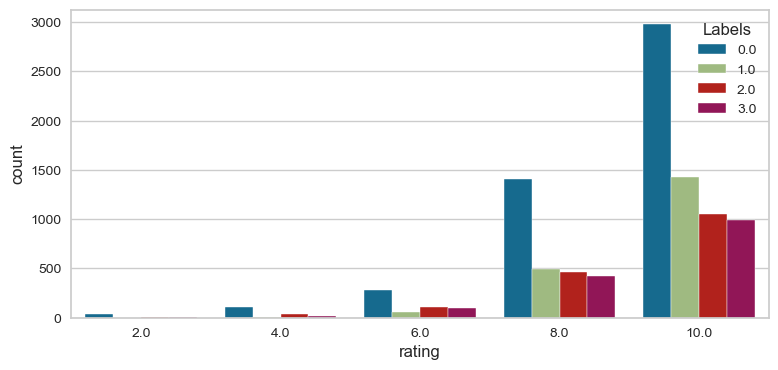

In [74]:
# Comparison of Rating and Label
plt.figure(figsize=[9,4])
sns.countplot(x=df_hier['rating'],hue=df_hier['Labels'],data=df_hier)
plt.show()

- **Cluster 1 has highest count of rating.**

In [75]:
categorical_feature = df_hier.columns
categorical_feature

Index(['fit', 'bust size', 'weight', 'rating', 'rented for', 'body type',
       'category', 'height', 'size', 'age', 'Labels'],
      dtype='object')

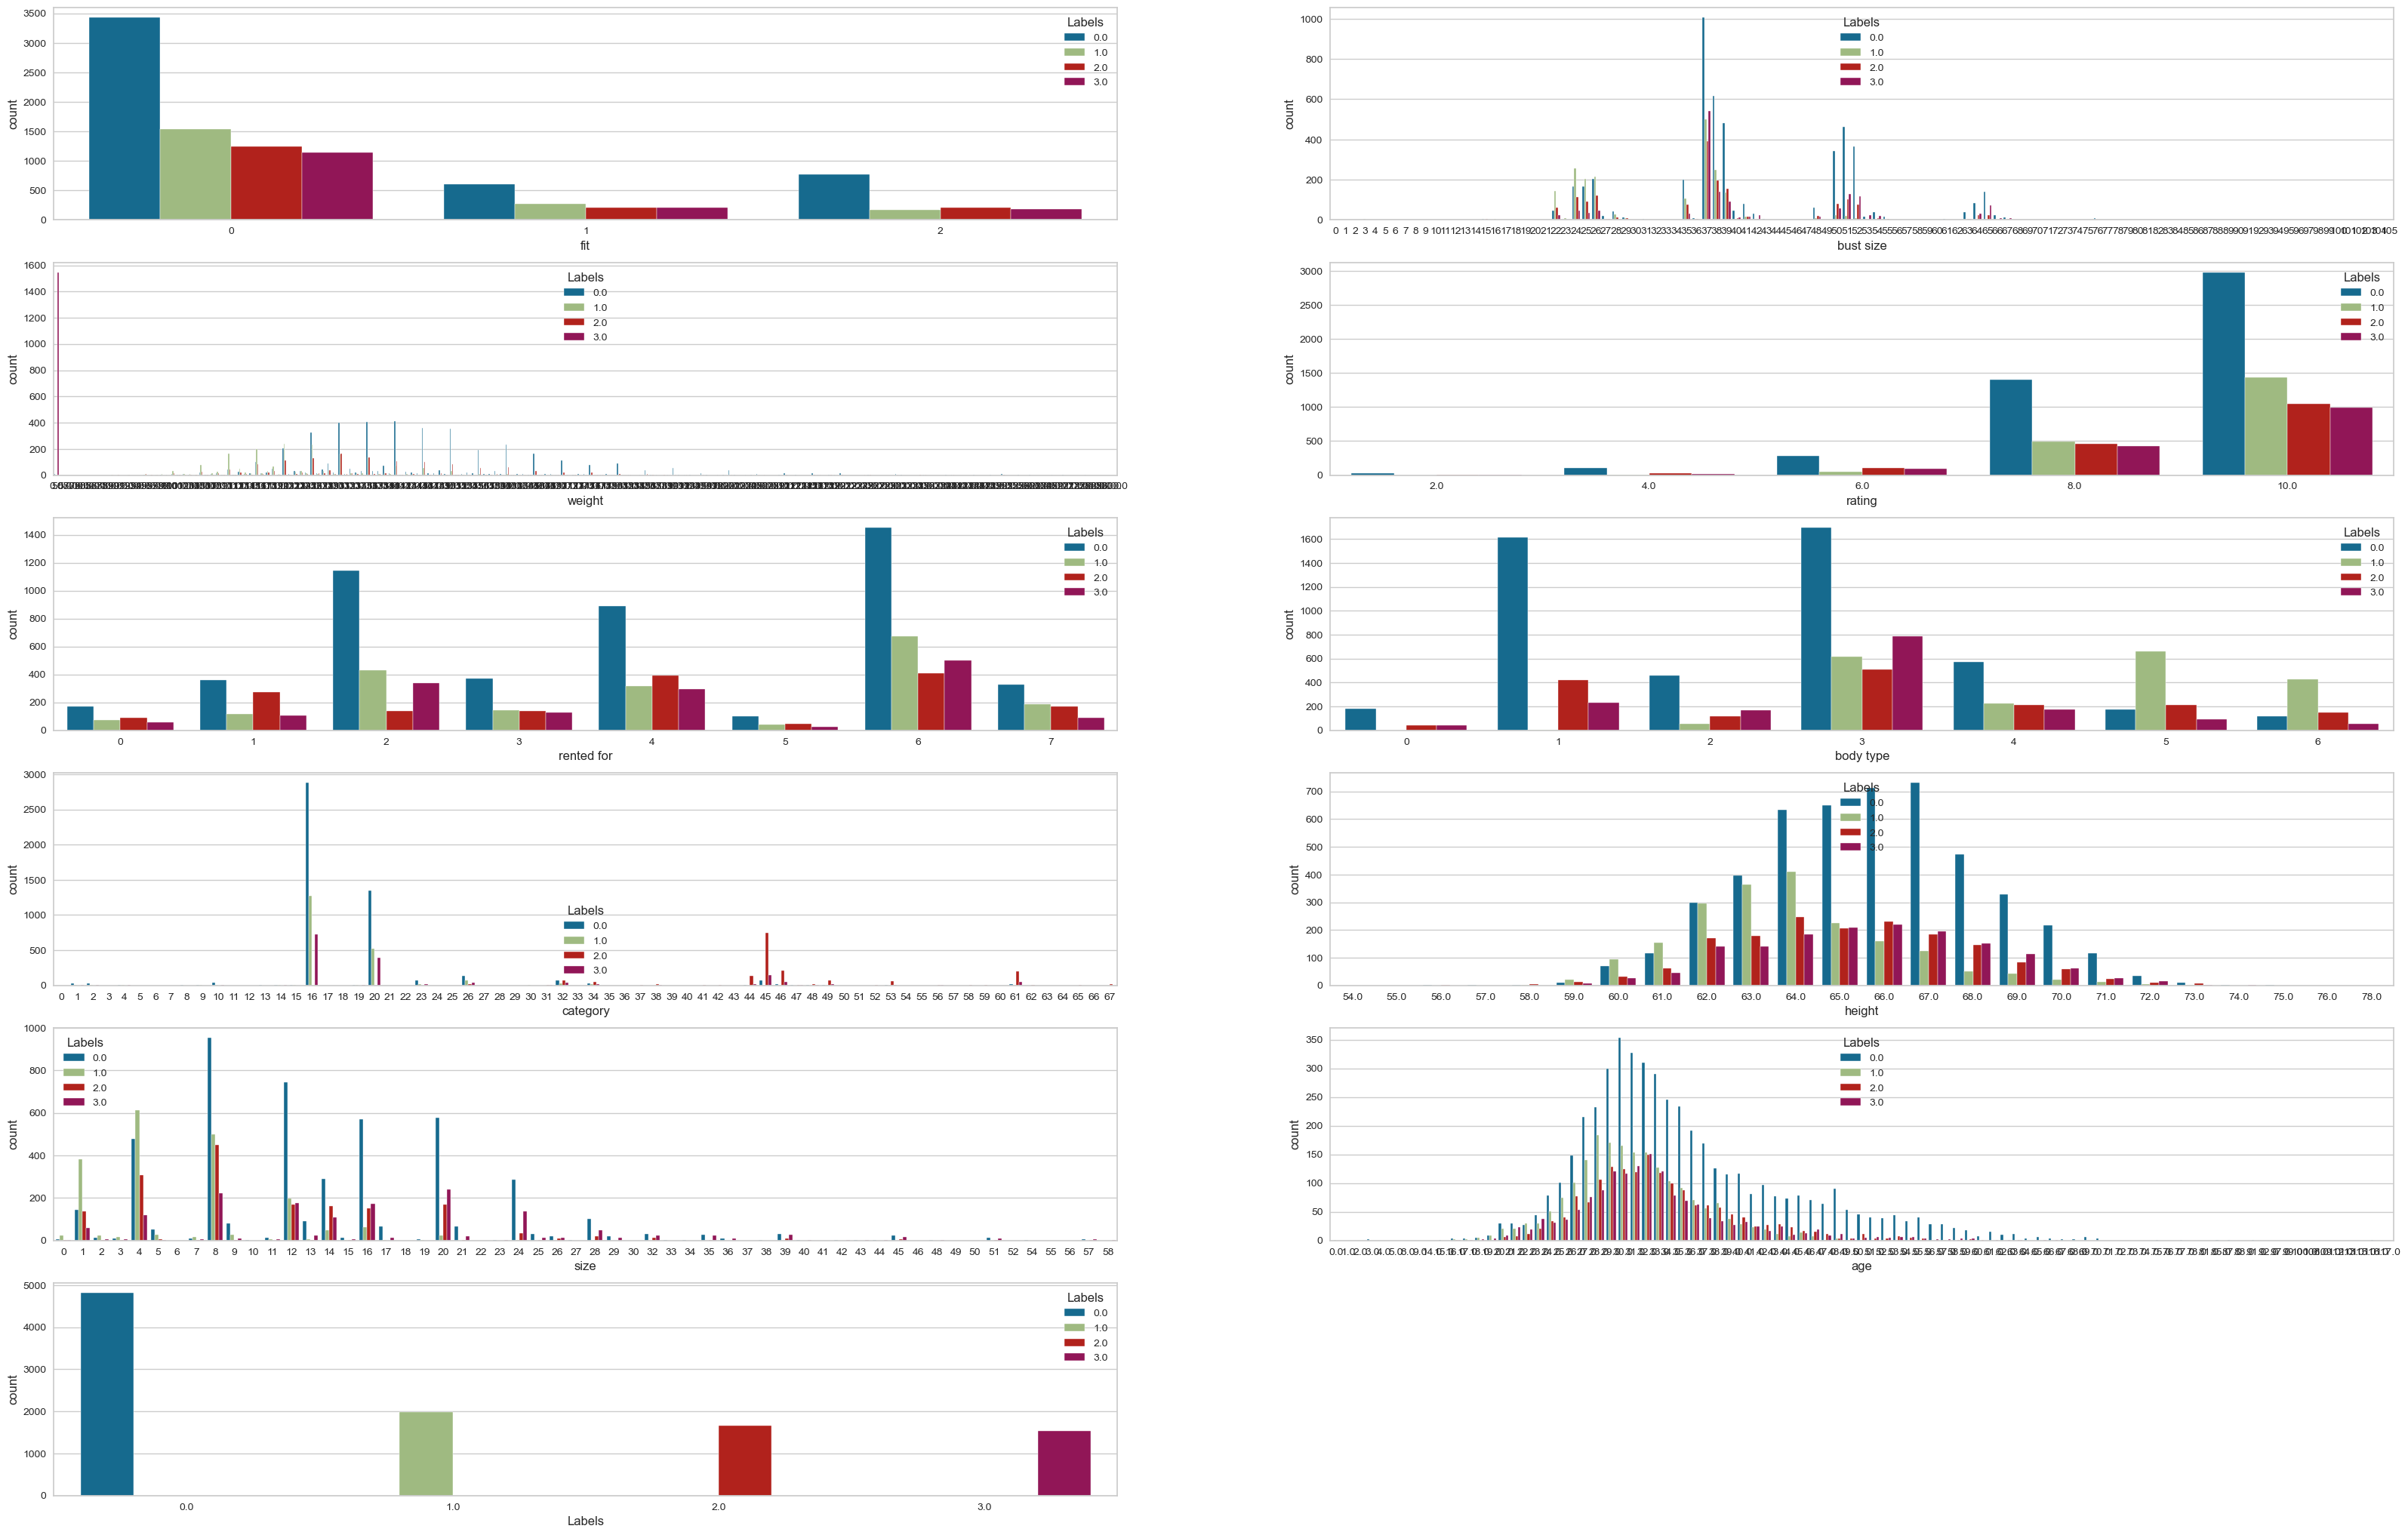

In [76]:
plt.figure(figsize=(40,30))
i=1
for feature in categorical_feature:
    plt.subplot(7,2,i)
    sns.countplot(x=feature,hue='Labels',data=df_hier)
    i+=1

### <font color = crimpson>● Visualization and Interpretation of results</font>

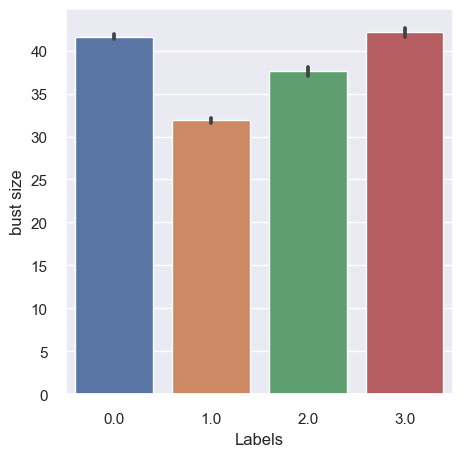

In [77]:
sns.set(rc={"figure.figsize":(5,5)})
sns.barplot(x=df_hier['Labels'],y=df_hier['bust size'])
plt.show()

- **Cluster associated with Label 3 is has people with highest bust size.**

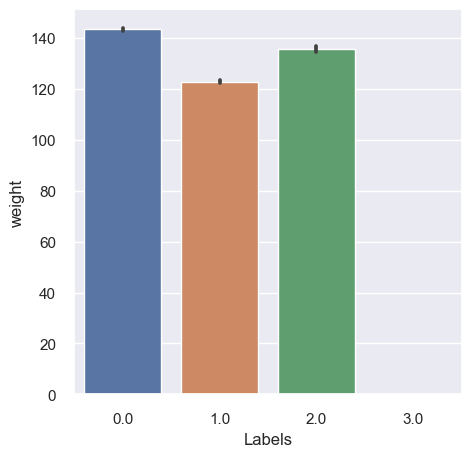

In [78]:
sns.set(rc={"figure.figsize":(5,5)})
sns.barplot(x=df_hier['Labels'],y=df_hier['weight'])
plt.show()

- **Cluster associated with Label 0  has people with highest weight and least weight is for cluster with label 3.**

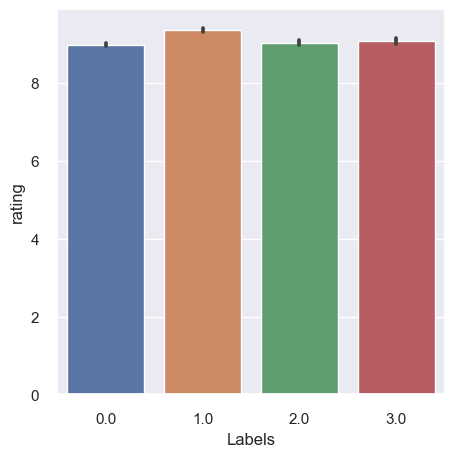

In [79]:
sns.set(rc={"figure.figsize":(5,5)})
sns.barplot(x=df_hier['Labels'],y=df_hier['rating'])
plt.show()

- **Cluster associated with label 1 is has  highest rating.**

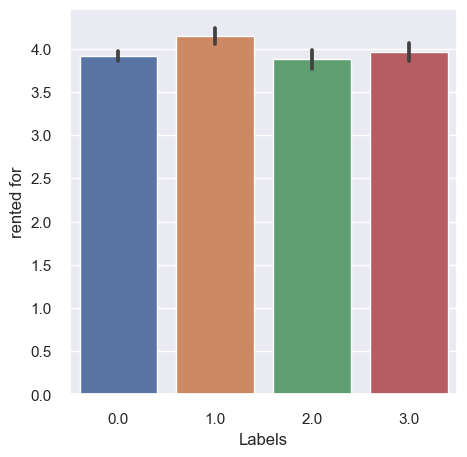

In [80]:
sns.set(rc={"figure.figsize":(5,5)})
sns.barplot(x=df_hier['Labels'],y=df_hier['rented for'])
plt.show()

- **Clusters associated with Labels 1 and 3 have rented most of the items with label 1 slightly higher than label 3.**

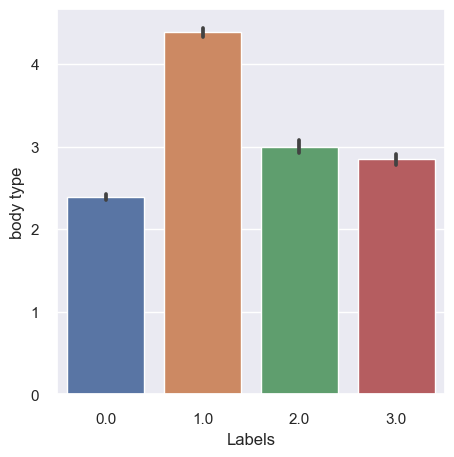

In [81]:
sns.set(rc={"figure.figsize":(5,5)})
sns.barplot(x=df_hier['Labels'],y=df_hier['body type'])
plt.show()

- **Cluster associated with Label 1 has highest number of people with valid body type.**

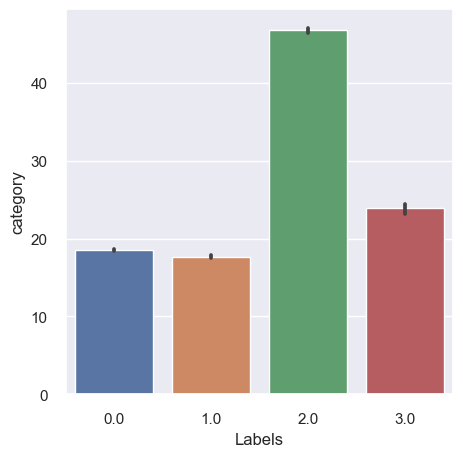

In [82]:
sns.set(rc={"figure.figsize":(5,5)})
sns.barplot(x=df_hier['Labels'],y=df_hier['category'])
plt.show()

- **Cluster associated with Label 2 is has highest amount of data in category.**

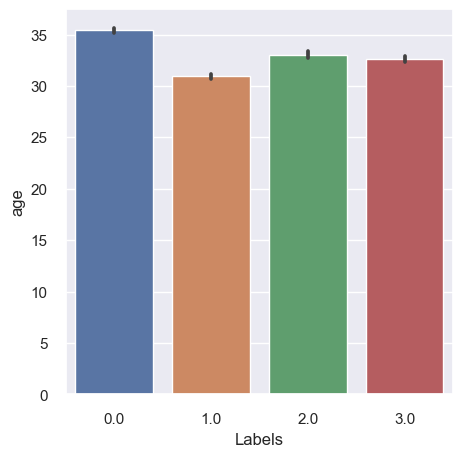

In [83]:
sns.set(rc={"figure.figsize":(5,5)})
sns.barplot(x=df_hier['Labels'],y=df_hier['age'])
plt.show()

- **Cluster associated with Label 0 has highest data pertaining to age.**

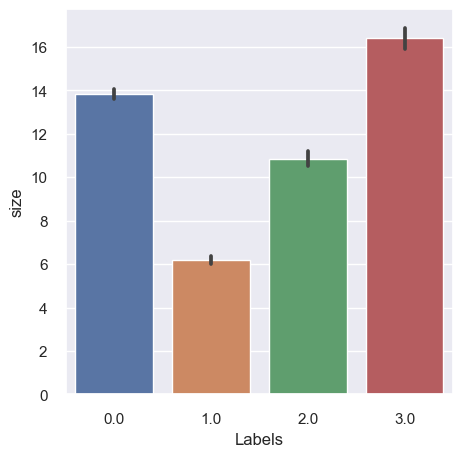

In [84]:
sns.set(rc={"figure.figsize":(5,5)})
sns.barplot(x=df_hier['Labels'],y=df_hier['size'])
plt.show()

- **Clusters associated with Label 0 and Label 3 have somewhat same and highest valid data for size.**

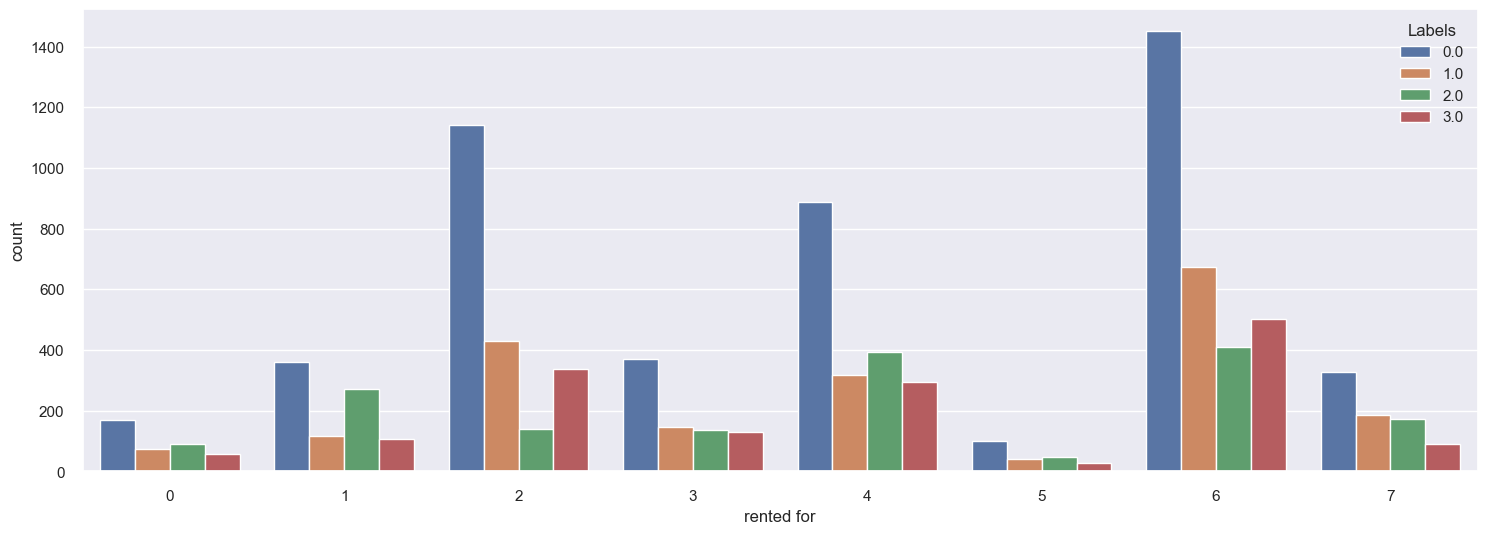

In [85]:
sns.set(rc={"figure.figsize":(18, 6)})
sns.countplot(data = df_hier, x = 'rented for', hue = 'Labels')
plt.show()

- **The bar plot above displays the purposes for which people have rented clothes.**

# <font color=#338CFF>● Inferences :</font>

- Since we deduced optimal K as 4, we have 4 clusters and labels associated: 0,1,2,3 for these 4.

- Cluster associated with Label 3 is has people with highest bust size.
- Cluster associated with Label 0 has people with highest weight and least weight is for cluster with label 3.
- Cluster associated with label 1 is has highest rating.
- Clusters associated with Labels 1 and 3 have rented most of the items with label1 slightly higher than label 3.
- Cluster associated with Label 1 has highest number of people with valid body type.
- Cluster associated with Label 2 is has highest amount of data in category.
- Cluster associated with Label 0 has highest data pertaining to age.
- Clusters associated with Label 0 and Label 3 have somewhat same and highest valid data for size.

## Thank You!